<a href="https://colab.research.google.com/github/SidddhantJain/FODS_LAB/blob/main/Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import matplotlib.pyplot as plt

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df=pd.read_csv('/content/drive/MyDrive/Dataset (2)/data_date.csv')

In [4]:
df

,Date,Country,Status,AQI Value
0,2022-07-21,Albania,Good,14
1,2022-07-21,Algeria,Moderate,65
2,2022-07-21,Andorra,Moderate,55
3,2022-07-21,Angola,Unhealthy for Sensitive Groups,113
4,2022-07-21,Argentina,Moderate,63
...,...,...,...,...
15806,2024-10-24,United States of America,Unhealthy for Sensitive Groups,116
15807,2024-10-24,Uzbekistan,Unhealthy,180
15808,2024-10-24,Vatican,Moderate,53
15809,2024-10-24,Venezuela,Good,24


In [5]:
data_cleaned=df.dropna()

In [6]:
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'])

In [7]:
data_cleaned['Year'] = data_cleaned['Date'].dt.year
data_cleaned['Month'] = data_cleaned['Date'].dt.month
data_cleaned['Day'] = data_cleaned['Date'].dt.day

In [8]:
data_cleaned = data_cleaned.drop(columns=['Date'])

In [9]:
label_encoder_country = LabelEncoder()
label_encoder_status = LabelEncoder()

In [10]:
data_cleaned['Country'] = label_encoder_country.fit_transform(data_cleaned['Country'])
data_cleaned['Status'] = label_encoder_status.fit_transform(data_cleaned['Status'])

In [11]:
scaler = StandardScaler()
data_cleaned['AQI Value'] = scaler.fit_transform(data_cleaned[['AQI Value']])

In [12]:
X = data_cleaned.drop(columns=['AQI Value'])
y = data_cleaned['AQI Value']

In [13]:
# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [14]:
print(data_cleaned)

       Country  Status  AQI Value  Year  Month  Day
0            0       0  -0.984233  2022      7   21
1            1       2   0.069308  2022      7   21
2            2       2  -0.137269  2022      7   21
3            3       4   1.060876  2022      7   21
4            4       2   0.027993  2022      7   21
...        ...     ...        ...   ...    ...  ...
15806      136       4   1.122849  2024     10   24
15807      137       3   2.444940  2024     10   24
15808      138       2  -0.178584  2024     10   24
15809      139       0  -0.777657  2024     10   24
15810      140       2   0.069308  2024     10   24

[15811 rows x 6 columns]


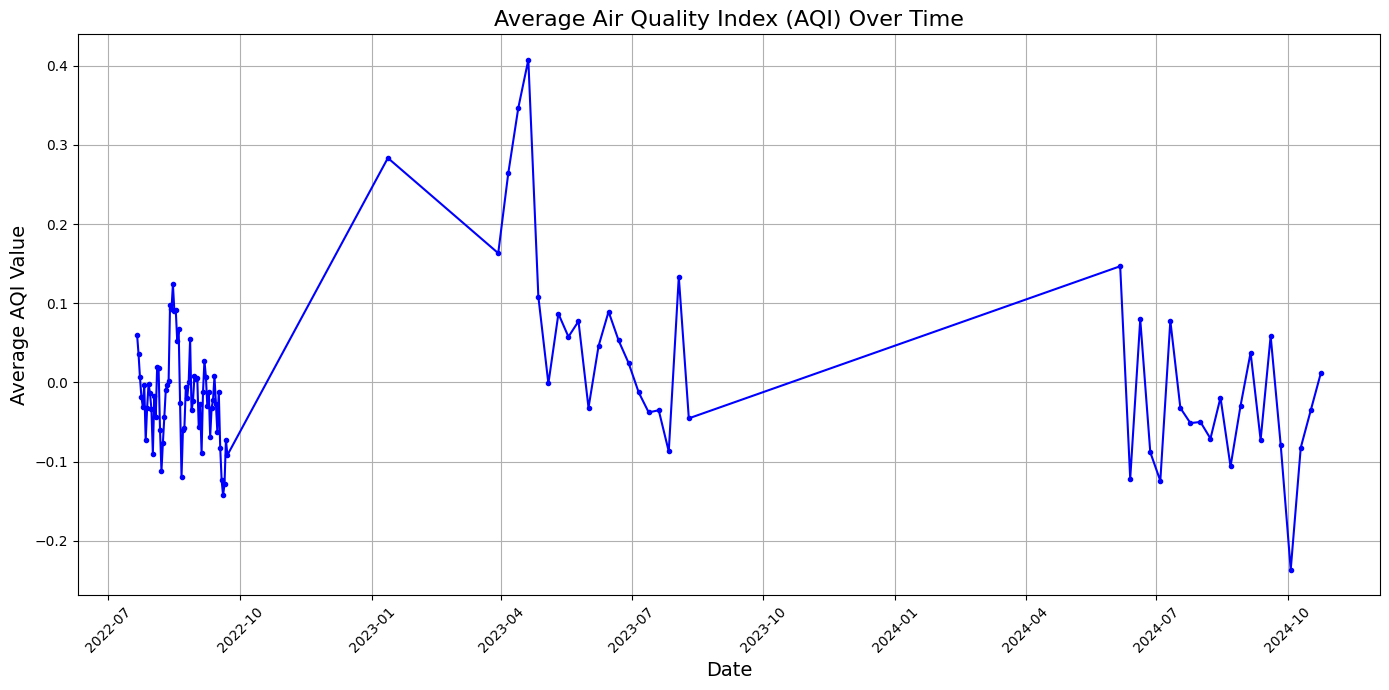

In [26]:
df_grouped = df.groupby(df['Date']).mean().reset_index()

df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])



plt.figure(figsize=(14, 7))
plt.plot(df_grouped['Date'], df_grouped['AQI Value'], marker='o', linestyle='-', color='b', markersize=3)
plt.title('Average Air Quality Index (AQI) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average AQI Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

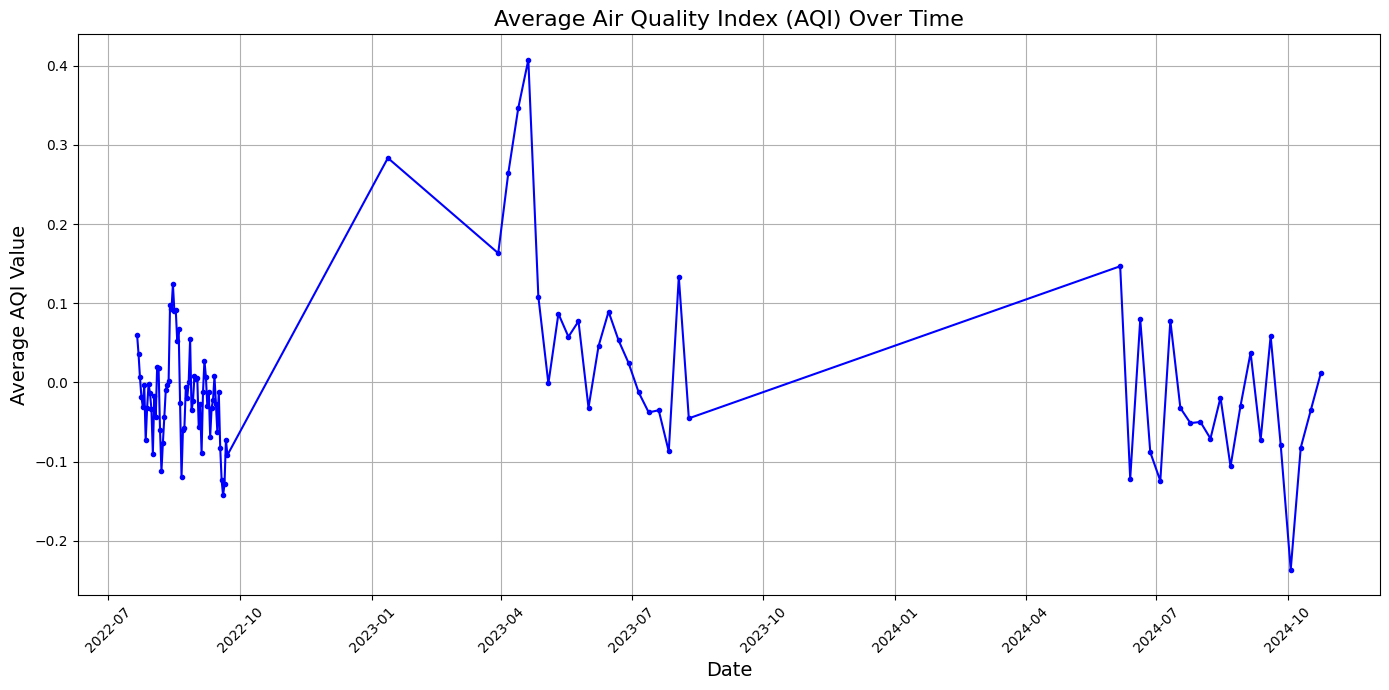

In [29]:
df_grouped = df.groupby(df['Date']).mean().reset_index()
df['Date'] = pd.to_datetime(df[['Year', 'Month', 'Day']])

# Group by Date and calculate the mean AQI Value for each date
#df_grouped = df.groupby('Date').mean().reset_index()

# Plotting the Time Series
plt.figure(figsize=(14, 7))
plt.plot(df_grouped['Date'], df_grouped['AQI Value'], marker='o', linestyle='-', color='b', markersize=3)
plt.title('Average Air Quality Index (AQI) Over Time', fontsize=16)
plt.xlabel('Date', fontsize=14)
plt.ylabel('Average AQI Value', fontsize=14)
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()  # Adjust layout to prevent clipping
plt.show()


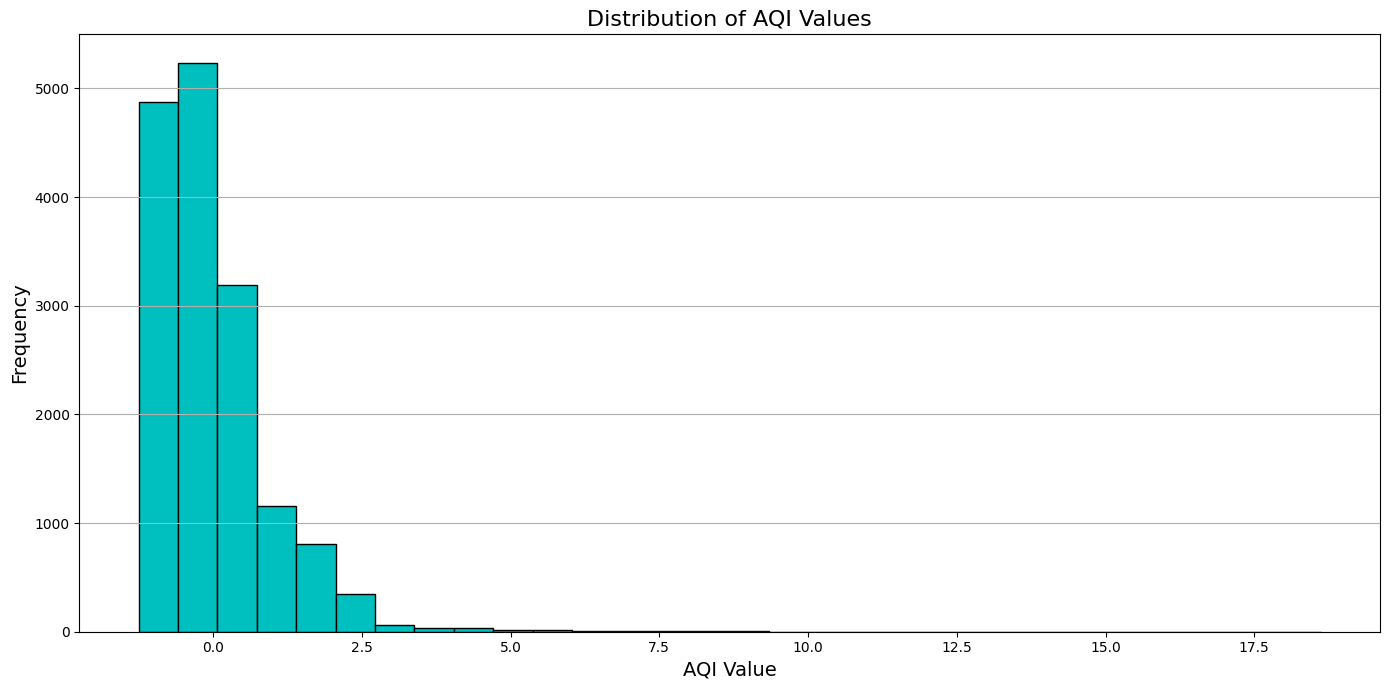

In [30]:
# Plotting the Histogram
plt.figure(figsize=(14, 7))
plt.hist(df['AQI Value'], bins=30, color='c', edgecolor='black')
plt.title('Distribution of AQI Values', fontsize=16)
plt.xlabel('AQI Value', fontsize=14)
plt.ylabel('Frequency', fontsize=14)
plt.grid(axis='y')
plt.tight_layout()
plt.show()
